# K-means Clustering From Scratch

## Import the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Making the Dataset

In [2]:
from sklearn import datasets
blobs = datasets.make_blobs(n_samples=500, random_state=33)

### Visualizing Dataset

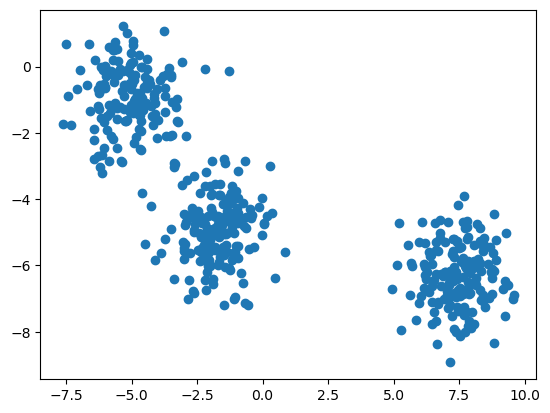

In [3]:
plt.scatter(blobs[0][:, 0], blobs[0][:, 1])
plt.show()

## Defining K-Means Class

In [4]:
class CustomKMeans():
    
    def __init__(self, n_cluster=1, max_iter=300, n_init=50):
        
        self.n_cluster = n_cluster
        self.max_iter = max_iter
        self.n_init = n_init
        
        self.cost_ = np.inf
        self.clusters_centers_ = None
        
    def fit(self, X):
        
        n_samples, n_features = X.shape
        for i in range(self.n_init):
            # 1. Pick n_clutser(K) random points and make them clutser ceontroids
            centroids_indices = np.random.choice(n_samples, self.n_cluster, replace=False)
            self.clusters_centers_ = X[centroids_indices]
            
            for j in range(self.max_iter):
                # 2. Assign each point to the nearest cluster center
                assigned_clusters = self.assign_clusters_(self.clusters_centers_, X)
                # 3. Calculate new cluster centers
                new_centers = self.calculate_centers_(assigned_clusters, X)
                # Check for convergence
                if (np.linalg.norm(self.clusters_centers_ - new_centers, axis=0) == 0).any():
                    break
                else:
                    self.clusters_centers_ = new_centers
            # 4. calculate and if applicable update cost
            current_cost = self.calculate_cost_(X, new_centers)
            if current_cost <= self.cost_:
                self.cost_ = current_cost
                self.clusters_centers_ = np.copy(new_centers)
                
    def assign_clusters_(self, centers, X):
        return np.array([np.argmin(np.linalg.norm(x - centers,axis=1)) for x in X])
    
    def calculate_centers_(self, assigned_clusters, X):
        new_centers = np.zeros((self.n_cluster, X.shape[1]))
        for k in range(self.n_cluster):
            new_centers[k] = (np.mean(X[assigned_clusters == k], axis = 0))
        return new_centers
    
    def calculate_cost_(self, X, new_centers):
        assigned_clusters = self.assign_clusters_(new_centers, X)
        return np.sum([np.linalg.norm(new_centers[n] - X[assigned_clusters == n]) ** 2 for n in range(self.n_cluster)])

## Instantiating and Fitting the model

In [5]:
ck = CustomKMeans(n_cluster=3)
ck.fit(blobs[0])

## Visualizing Clustering Results

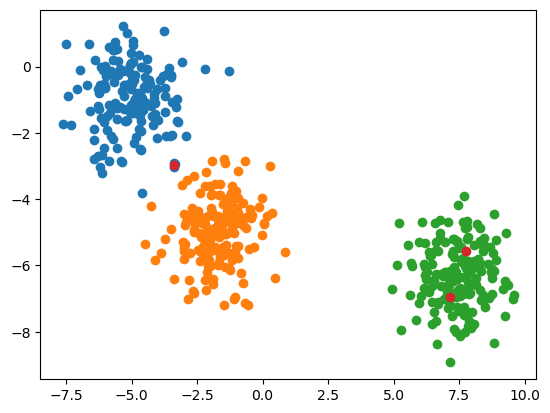

In [6]:
plt.scatter(blobs[0][blobs[1]==0][:,0], blobs[0][blobs[1]==0][:,1])
plt.scatter(blobs[0][blobs[1]==1][:,0], blobs[0][blobs[1]==1][:,1])
plt.scatter(blobs[0][blobs[1]==2][:,0], blobs[0][blobs[1]==2][:,1])
plt.scatter(ck.clusters_centers_[:, 0], ck.clusters_centers_[:, 1])
plt.show()

## Calculating V Measure Score

In [7]:
y_pred = ck.assign_clusters_(ck.clusters_centers_, blobs[0])

In [8]:
from sklearn.metrics import v_measure_score
score = v_measure_score(blobs[1], y_pred)
print(score)

0.6472025415883156
